In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# -------------------- Load Dataset --------------------
df = pd.read_csv("C:/learnathon/dataset.csv")  # ✅ Adjust path if needed

# -------------------- Drop Irrelevant Columns --------------------
df = df.drop(columns=['Name', 'Doctor', 'Room Number'], errors='ignore')  # safely drop if columns exist

# -------------------- Convert Date Columns --------------------
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# -------------------- Feature Engineering: Length of Stay --------------------
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df = df.drop(columns=['Date of Admission', 'Discharge Date'])

# -------------------- Encode Categorical Variables --------------------
categorical_cols = [
    'Gender', 'Blood Type', 'Medical Condition', 'Hospital',
    'Insurance Provider', 'Admission Type', 'Medication', 'Test Results'
]

label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# -------------------- Create Target Column: Readmitted (Simulated) --------------------
df['Readmitted'] = ((df['Length of Stay'] > 10) | (df['Billing Amount'] > 30000)).astype(int)

# -------------------- Feature Scaling --------------------
X = df.drop(columns=['Readmitted'])
y = df['Readmitted']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Save Preprocessed Data
processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df['Readmitted'] = y
processed_df.to_csv("C:/learnathon/preprocessed_dataset.csv", index=False)

# -------------------- Done --------------------
print(" Data preprocessing complete , dataset saved as 'preprocessed_dataset.csv'.")


 Data preprocessing complete , dataset saved as 'preprocessed_dataset.csv'.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# -------------------- Load Preprocessed Dataset --------------------
df = pd.read_csv("C:/learnathon/preprocessed_dataset.csv")  # 

# -------------------- Split Features and Target --------------------
X = df.drop('Readmitted', axis=1)
y = df['Readmitted']

# -------------------- Feature Scaling --------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- Train/Test Split --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------- Train Model --------------------
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

# -------------------- Predict and Report --------------------
y_proba = model.predict_proba(X_test)[:, 1]
avg_predicted_risk = y_proba.mean() * 100

print(f"\nPrediction of Readmission Risk : {avg_predicted_risk:.2f}%")



Prediction of Readmission Risk : 80.61%



📊 Evaluation Metrics:
🔹 Accuracy:  93.45%
🔹 Precision: 95.50%
🔹 Recall:    96.41%
🔹 F1 Score:  95.95%
🔹 ROC AUC:   98.12%


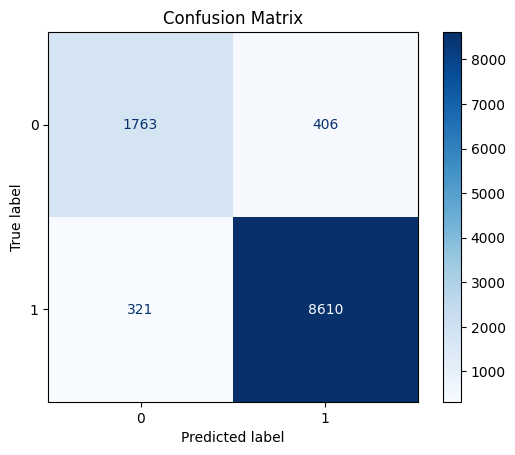

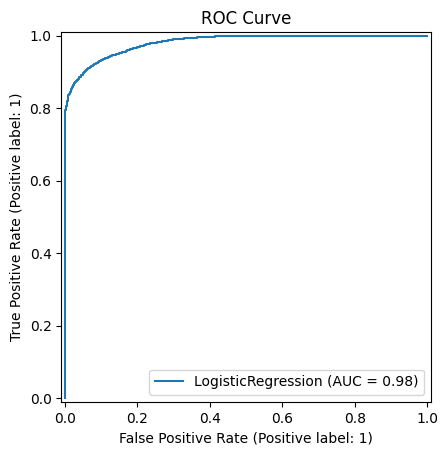

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# -------------------- Predict --------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# -------------------- Evaluation Metrics --------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\n📊 Evaluation Metrics:")
print(f"🔹 Accuracy:  {accuracy:.2%}")
print(f"🔹 Precision: {precision:.2%}")
print(f"🔹 Recall:    {recall:.2%}")
print(f"🔹 F1 Score:  {f1:.2%}")
print(f"🔹 ROC AUC:   {roc_auc:.2%}")

# -------------------- Confusion Matrix --------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# -------------------- ROC Curve --------------------
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the preprocessed dataset
df = pd.read_csv("C:/learnathon/preprocessed_dataset.csv")

# Prepare the model
X = df.drop('Readmitted', axis=1)
y = df['Readmitted']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=3000)
model.fit(X_scaled, y)

# Create input widgets for user interaction
gender = widgets.Dropdown(options=['Male', 'Female'], description='Gender:')
blood_type = widgets.Dropdown(options=['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-'], description='Blood Type:')
medical_condition = widgets.Text(description='Medical Condition:')
hospital = widgets.Text(description='Hospital:')
insurance_provider = widgets.Text(description='Insurance Provider:')
admission_type = widgets.Text(description='Admission Type:')
medication = widgets.Text(description='Medication:')
test_results = widgets.Text(description='Test Results:')
billing_amount = widgets.FloatText(description='Billing Amount:')
length_of_stay = widgets.IntText(description='Length of Stay (days):')

# Button to make predictions
predict_button = widgets.Button(description='Predict Readmission Risk')

# Output area for displaying results
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        
        # Prepare input data
        input_data = {
            'Gender': gender.value,
            'Blood Type': blood_type.value,
            'Medical Condition': medical_condition.value,
            'Hospital': hospital.value,
            'Insurance Provider': insurance_provider.value,
            'Admission Type': admission_type.value,
            'Medication': medication.value,
            'Test Results': test_results.value,
            'Billing Amount': billing_amount.value,
            'Length of Stay': length_of_stay.value
        }
        
        # Convert to DataFrame
        input_df = pd.DataFrame([input_data])
        
        # Encode categorical variables
        for col in ['Gender', 'Blood Type', 'Medical Condition', 'Hospital', 
                    'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']:
            if col in input_df.columns:
                le = LabelEncoder()
                input_df[col] = le.fit_transform(input_df[col])
        
        # Scale the input data
        input_scaled = scaler.transform(input_df)
        
        # Make prediction
        prediction = model.predict(input_scaled)
        prediction_proba = model.predict_proba(input_scaled)[:, 1]
        
        # Display results
        print(f"Predicted Readmission Risk: {'Yes' if prediction[0] == 1 else 'No'}")
        print(f"Probability of Readmission: {prediction_proba[0] * 100:.2f}%")

# Attach the button click event
predict_button.on_click(on_predict_button_clicked)

# Display the UI
display(gender, blood_type, medical_condition, hospital, insurance_provider, admission_type, medication, test_results, billing_amount, length_of_stay, predict_button, output)


Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Dropdown(description='Blood Type:', options=('A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-'), value='A+')

Text(value='', description='Medical Condition:')

Text(value='', description='Hospital:')

Text(value='', description='Insurance Provider:')

Text(value='', description='Admission Type:')

Text(value='', description='Medication:')

Text(value='', description='Test Results:')

FloatText(value=0.0, description='Billing Amount:')

IntText(value=0, description='Length of Stay (days):')

Button(description='Predict Readmission Risk', style=ButtonStyle())

Output()